# Day 12 In-Class: Overview of data and file formats; US Population and Representation

### <p style="text-align: right;"> &#9989; Put your name here</p>

<!-- 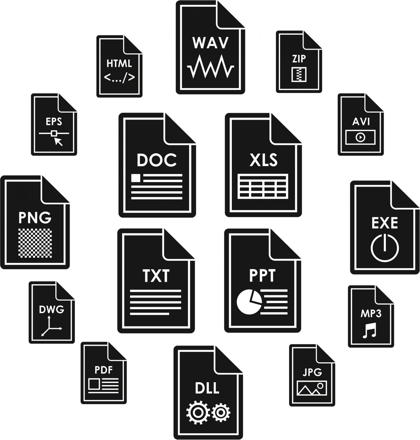 -->

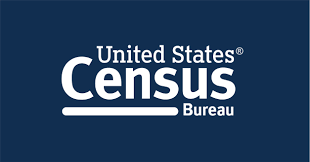

## Learning Goals:

By the end of this assignment you should be able to:
- Review some basics of file formats
- Load in a variety of file formats
- Clean data loaded from files
- Practice using online research to learn new programming skills
- Sort arrays and dataframes by their values

### File Formats Review

As discussed in the pre-class, there are thousands of accepted file formats.  For an abbreviated list, see this [summary on wikipedia](https://en.wikipedia.org/wiki/List_of_file_formats).

In general, all computer files store information as a series of bits (binary 1's and 0's).  Typically 8 bits are combined into a single byte.  All files can be categorized as:
- **Text files**: where the bytes represent characters using a standard encoding scheme like UTF-8. 
- **Binary files**: where the bytes represent a custom organization of information.  A single binary files can information encoded as strings, floats, and/or ints.  

Refer back to the pre-class for tips on how to identify file types and the key information in order to load data from a text file (ex: delimiter, line feed, encoding, etc).  

---

## Part 0. Goals for today

In the realm of data science, datasets can be encountered in a variety of formats such as text files (txt), binary files (bin), and comma-separated values (csv), among others. Each format has its own structure and way of storing information, which can present challenges when trying to analyze data collectively from different sources. It's crucial, therefore, to amalgamate these diverse datasets into a single, cohesive dataset. Consolidating data into a unified format streamlines the data processing workflow, enabling more efficient analysis, visualization, and model building. The process of integrating datasets might involve converting file formats, standardizing data structures, and harmonizing data types and scales. By bringing disparate data sources together into one dataset, analysts and scientists can extract more comprehensive insights and make more informed decisions, leveraging the full spectrum of available information.

The goal of today's assignment is multifaceted, starting with the task of reading in datasets from various formats including text files (txt), binary files (bin), and comma-separated values (csv). This initial step emphasizes the importance of being adept at handling data in any form it might come. Following the data acquisition, the core objective shifts to merging these different datasets into a single, coherent dataset. This merging process is crucial for creating a unified data foundation upon which further analysis can be built. 

After successfully combining the datasets, the assignment culminates with performing Exploratory Data Analysis (EDA) on this newly formed dataset. The EDA process will allow us to uncover patterns, spot anomalies, identify main characteristics, and gain deeper insights into the data. Through this assignment, not only will you practice essential data handling and preprocessing skills, but you will also explore and analyze the integrated dataset to derive meaningful conclusions and inform future data-driven decisions.

----
## Part 1. Load data files

Download all of the files that start with `us_pop_by_state*`. These files contain population estimates from the US Census. (For population estimates methodology statements, see http://www.census.gov/programs-surveys/popest/technical-documentation/methodology.html.)  The US Census has a fascinating 230 year history (https://www.census.gov/history/).

Using the information you found in the pre-class, load all of these files into pandas data frames.  When successful, you should have the population of all states in the US for 2010 through 2019 stored in one pandas dataframe. There are some hints and/or suggestions embedded in the comments in the cells below.

In [1]:
# import all necessary modules (matplotlib, numpy, pandas)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# import the pandas module
import pandas as pd


In [2]:
# Load us_pop_by_state_2010_2011 in a dataframe
us2010 = pd.read_csv('us_pop_by_state_2010_2011.csv', delimiter = ';')
us2010.head()

,State,2010,2011
0,Alabama,4785437,4799069
1,Alaska,713910,722128
2,Arizona,6407172,6472643
3,Arkansas,2921964,2940667
4,California,37319502,37638369


### 1.1 Loading UTF-16be Data

&#9989;&nbsp;  **Task:** Load `us_pop_by_state_2012_2013_encoding_utf-16be.csv` file. See tips in pre-class if having trouble.

In [3]:
# Load us_pop_by_state_2012_2013_encoding_utf-16be

us2012 = pd.read_csv('us_pop_by_state_2012_2013_encoding_utf-16be.csv', thousands=',',delimiter = ',', encoding='utf-16be')
us2012 = us2012.drop(columns = 'Unnamed: 0')
us2012.head()

,State,2012,2013
0,Alabama,4815588,4830081
1,Alaska,730443,737068
2,Arizona,6554978,6632764
3,Arkansas,2952164,2959400
4,California,37948800,38260787


### 1.2 Loading Windows Linefeed Data

&#9989;&nbsp;  **Task:** Load `us_pop_by_state_2014_2015_windows_linefeed.csv`. If you try opening this file using `.read_csv()` you will notice that it is not in the same format as the one above. Search the internet specifically the `read_csv` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)  to find ways to open this file.

**Hint:** *What is the delimiter for this file?  How could that lead to trouble? Do you need the first row?*

In [4]:
# Load us_pop_by_state_2014_2015_windows_linefeed 
us2014 = pd.read_csv('us_pop_by_state_2014_2015_windows_linefeed.csv',delim_whitespace = True,skiprows = 1, encoding='utf-8')
us2014.head()

,State,2014,2015
0,Alabama,4841799,4852347
1,Alaska,736283,737498
2,Arizona,6730413,6829676
3,Arkansas,2967392,2978048
4,California,38596972,38918045


### 1.3 Loading Binary Data

Ok, let's kick it up a notch. The file `us_pop_by_state_2016a.csv` has the extension `.csv` but it is in a binary format. 

&#9989;&nbsp; **Task:** Search the internet on how to load binary files using `numpy` with data type `float32`. Then load the data from the file `us_pop_by_state_2016a.csv` into a `pandas.Series`, give it the `name = "2016"`. Then display the first few values.

**IMPORTANT NOTE:** The data type `float32` is very important!!! Look for the input option `dtpye`. If you load in the file correctly, you will notice that it is a single array of data with one number per state in alphabetical order (same order as other files). 

In [5]:
# put your code here
states = us2014['State']
states = pd.DataFrame(states)

us2016 = np.fromfile(file = 'us_pop_by_state_2016a.csv', dtype='float32')
us2016 = pd.DataFrame(us2016, columns =['2016']) 
us2016['State'] = states
us2016 = us2016.reindex(columns=['State','2016'])
us2016.head()

,State,2016
0,Alabama,4863525.0
1,Alaska,741456.0
2,Arizona,6941072.0
3,Arkansas,2989918.0
4,California,39167116.0


&#9989;&nbsp; **Task:** Now try loading the binary data file `us_pop_by_state_2017a.yaff`. This time the file has a 32-bit data type as well, but it is 32-bit integers!. Don't forget to make it into a `pandas.Series` and give it the `name = "2017"` and orint the first few values. 

In [6]:
# Load "us_pop_by_state_2017a.yaff"
us2017 = np.fromfile(file = 'us_pop_by_state_2017a.yaff', dtype='int32')
us2017 = pd.DataFrame(us2017, columns =['2017']) 
us2017['State'] = states
us2017 = us2017.reindex(columns=['State','2017'])
us2017.head()

,State,2017
0,Alabama,4874486
1,Alaska,739700
2,Arizona,7044008
3,Arkansas,3001345
4,California,39358497


### 1.4 Loading the Rest

&#9989;&nbsp; **Task:** Finally load the file `'us_pop_by_state_2018_2019.bin'` containing data for 2018 and 2019. As in the above cases you will notice that data appears as a one-dimensional array. You might want to print out the shape (or lenght) of the array. 

In [7]:
# Load us_pop_by_state_2018_2019.bin
us2018 = np.fromfile(file = 'us_pop_by_state_2018_2019.bin', dtype='int32')
us2019 = us2018[51:102]
us2018 = us2018[0:51]
us2018 = pd.DataFrame(us2018, columns =['2018']) #,'2019']) 
us2018['State'] = states
us2018['2019'] = us2019
us2018 = us2018.reindex(columns=['State','2018','2019'])
us2018.head()

,State,2018,2019
0,Alabama,4887681,4887681
1,Alaska,735139,735139
2,Arizona,7158024,7158024
3,Arkansas,3009733,3009733
4,California,39461588,39461588


&#9989;&nbsp; **Question:** What do you notice? How many values are in this dataset?

<font size=+3>&#9998;</font> *102 rows of repeating data.*

&#9989;&nbsp; **Task:** Your task is to make a `DataFrame` out of the data with columns names ["2018", "2019"]. Note that the first 51 values of the above data is the population for year 2018 and the next 51 values is the population of year 2019. 

Below there is a pseudocode on how to achieve this task

In [8]:
# Separate the data into two arrays or lists of data:
# Make a array/list out of the first 51 values

# Make a array/list out of the next 51 values

# Concatenate the two arrays/lists into one 2D array (or list of lists). 

# The new array (or list of lists) should have 51 rows and 2 columns. 
# You might want to search the internet for this.

# Make a DataFrame out of the concatenated dataset


# Display the first few rows 

#all done above :)

&#9989;&nbsp; **Question:** How is the `pd.read_csv()` function different from the `numpy` function use to open the binary files?  Discuss with your group members and put your answer below.

<font size=+3>&#9998;</font> *Cannot skip rows, useful for reading binary files not formatted as csv.*

### 1.5 Merging and concatenating datasets

Finally, we have lots of data scattered into different variables names, let's put them all together. 

&#9989;&nbsp; **Task:** Create one `DataFrame` called `us_pop` that contains the population of each state for the years 2010 - 2019. Search the internet for ways to merge or concatenate dataframes together. The final outcome should look like this

|     | State      | 2010     | 2011     | 2012     | 2013     | 2014     | 2015     | 2016       | 2017     | 2018     | 2019    |
|-----|------------|----------|----------|----------|----------|----------|----------|------------|----------|----------|---------|
| **0**   | Alabama    | 4785437  | 4799069  | 4815588  | 4830081  | 4841799  | 4852347  | 4863525.0  | 4874486  | 4887681  | 4903185 |
| **1**   | Alaska     | 713910   | 722128   | 730443   | 737068   | 736283   | 737498   | 741456.0   | 739700   | 735139   | 731545  |
| **2**   | Arizona    | 6407172  | 6472643  | 6554978  | 6632764  | 6730413  | 6829676  | 6941072.0  | 7044008  | 7158024  | 7278717 |
| **3**   | Arkansas   | 2921964  | 2940667  | 2952164  | 2959400  | 2967392  | 2978048  | 2989918.0  | 3001345  | 3009733  | 3017804 |
| **4**   | California | 37319502 | 37638369 | 37948800 | 38260787 | 38596972 | 38918045 | 39167116.0 | 39358497 | 39461588 | 39512223|


In [24]:
# Put your code here
uspop = pd.DataFrame(states, columns =['State'])
uspop['2010'] = us2010['2010']
uspop['2011'] = us2010['2011']
uspop['2012'] = us2012['2012']
uspop['2013'] = us2012['2013']
uspop['2014'] = us2014['2014']
uspop['2015'] = us2014['2015']
uspop['2016'] = us2016['2016']
uspop['2017'] = us2017['2017']
uspop['2018'] = us2018['2018']
uspop['2019'] = us2018['2019']
us_pop = uspop
us_pop.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525.0,4874486,4887681,4887681
1,Alaska,713910,722128,730443,737068,736283,737498,741456.0,739700,735139,735139
2,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072.0,7044008,7158024,7158024
3,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918.0,3001345,3009733,3009733
4,California,37319502,37638369,37948800,38260787,38596972,38918045,39167116.0,39358497,39461588,39461588


### 1.6 Saving datasets

Phew, That was a lot of work! Let's make our future projects easier and save the dataset we have just created. This way we don't have to run all the above code cells everytime we need US population data. 

&#9989;&nbsp; **Task:** Use the `.to_csv()` method to save the newly created dataset on your computer. Search the internet for `.to_csv()` documentation.

In [21]:
# Put your code here
us_pop.to_csv('us_population.csv',index=False)


---
## Part 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical initial step in your data analysis journey. It's like being a detective looking for clues in your data before deciding on your investigation's direction. EDA involves summarizing the main characteristics of a dataset, often with visual methods, to uncover patterns, spot anomalies, identify important variables, and test assumptions. It's about getting to know your data: you might generate summary statistics (like mean, median, and standard deviation), visualize data through charts (histograms, scatter plots, box plots), and look for relationships between variables. 

**The goal is to understand the data you're working with, inform the choice of appropriate analytical tools, and provide insights for further data processing**. Think of EDA as your foundational step – it sets the stage for all the sophisticated analyses you'll perform later and ensures you're working with clean, relevant data.

In the cells below, we will try to understand data using visualization and summary statistics.

### 2.1 Summary statistics

&#9989;&nbsp; **Task:** Display summary statistics of the new dataset.

In [25]:
# Put your code here
us_pop.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.0,5.100000e+01,5.100000e+01,5.100000e+01
mean,6.065131e+06,6.108958e+06,6.153549e+06,6.195955e+06,6.241196e+06,6.286964e+06,6332182.5,6.372265e+06,6.405637e+06,6.405637e+06
std,6.838022e+06,6.901810e+06,6.967073e+06,7.029241e+06,7.100271e+06,7.172361e+06,7235903.5,7.288670e+06,7.327258e+06,7.327258e+06
min,5.644870e+05,5.672990e+05,5.763050e+05,5.821220e+05,5.825310e+05,5.856130e+05,584215.0,5.789310e+05,5.776010e+05,5.776010e+05
25%,1.700144e+06,1.712291e+06,1.724314e+06,1.732560e+06,1.740300e+06,1.746554e+06,1756701.5,1.767360e+06,1.777414e+06,1.777414e+06
50%,4.348181e+06,4.369821e+06,4.386346e+06,4.404659e+06,4.414349e+06,4.425976e+06,4438182.0,4.452268e+06,4.461153e+06,4.461153e+06
75%,6.654568e+06,6.720105e+06,6.780032e+06,6.838650e+06,6.908626e+06,6.996666e+06,7117921.5,7.233685e+06,7.340946e+06,7.340946e+06
max,3.731950e+07,3.763837e+07,3.794880e+07,3.826079e+07,3.859697e+07,3.891804e+07,39167116.0,3.935850e+07,3.946159e+07,3.946159e+07


&#9989;&nbsp; **Questions:** Look at the output. Notice something in particular? Without using any code answer the following questions

1. What is the average population in 2016? How does this compare with the total US population (~350 Millions)?
2. What does the `max` value indicate?
3. In the above output can you find the total US population of each year? 
4. Is the average population in the US increasing or decreasing over the years?
5. Are the mean and median the same? Does your answer suggest that the population is normally distributed (_i.e._ does it look like a normal (Gaussian) distribution)?
6. How does the standard deviation compare to the mean? How much larger/smaller ? What does this indicate?

<font size=+3>&#9998;</font> *6332182.  Max value indicates the highest state population in that year. No the total is not there*

### 2.2 Visualization

&#9989;&nbsp; **Task:** Run the code cell below. Use the comments in the code to understand what the code does, but do not spend too much time on it. You can review the code at home, focus on the plots it produces instead.

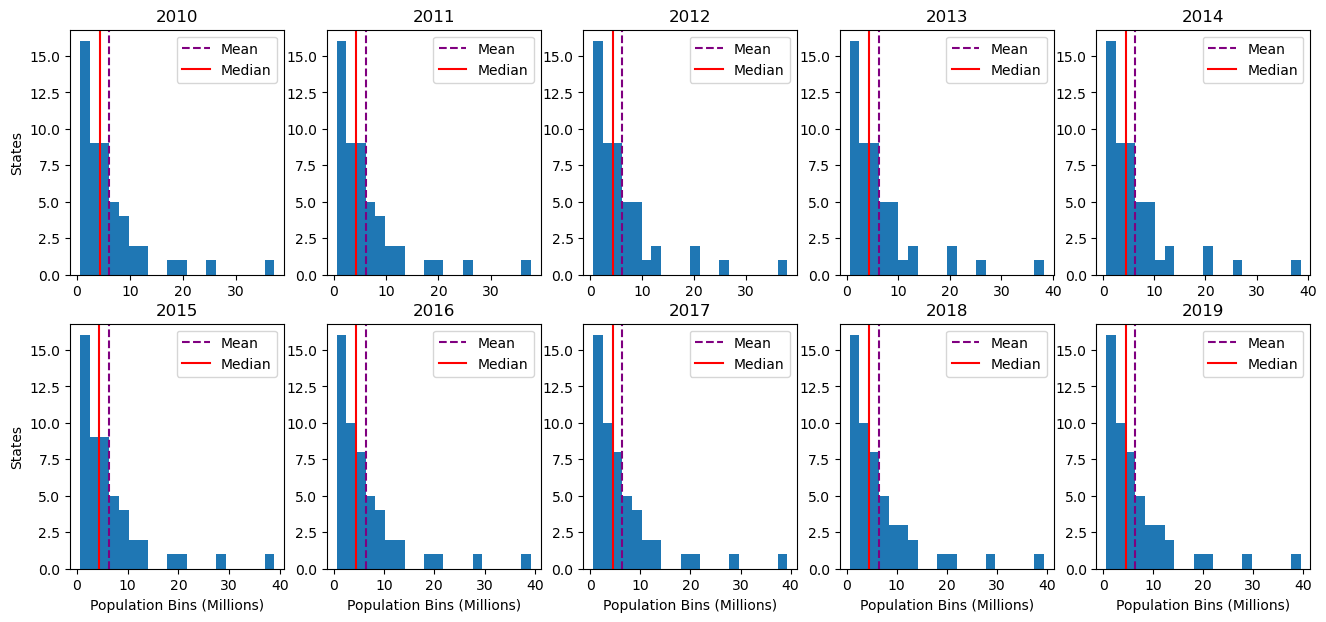

In [26]:
# Create a figure and a grid of subplots with 2 rows and 5 columns. 
# figsize sets the figure's width and height in inches.
fig, axes = plt.subplots(2, 5, figsize=(16, 7))

# Flatten the 2D array of axes objects to enable easy iteration.
ax_flat = axes.flatten()

# Loop through each column in the dataset, starting from the second column, 
# as the first column is likely to be non-numeric or identifiers like state names.
for i, column_label in enumerate(us_pop.columns[1:]):
    # Plot a histogram of the column's data, converting the values to millions (dividing by 1e6) for readability.
    ax_flat[i].hist(us_pop[column_label]/1e6, bins=20)
    
    # Add a vertical dashed line to indicate the mean of the data, colored purple and labeled.
    ax_flat[i].axvline(us_pop[column_label].mean()/1e6, ls='--', c='purple', label='Mean')
    
    # Add another vertical line to indicate the median of the data, colored red and labeled.
    ax_flat[i].axvline(us_pop[column_label].median()/1e6, ls='-', c='red', label='Median')
    
    # Display a legend in the plot to identify the mean and median lines.
    ax_flat[i].legend()
    
    # Set the title of each subplot to the name of the column being plotted.
    ax_flat[i].set_title(f"{column_label}")

# Label the x-axis of the bottom row subplots as 'Population Bins [Millions]' for clarity.
for ax in axes[1, :]:
    ax.set_xlabel('Population Bins (Millions)')

# Label the y-axis of the first column subplots as 'States' to indicate the data being plotted.
for ax in axes[:, 0]:
    ax.set_ylabel('States')


### &#128721; STOP

**Take a moment to look at the plots and reflect on what they tell you:** 

&#9989;&nbsp; **Questions:** Do you understand the plots? How many states have a population less than 5 Millions on average? How do your answers from the questions above change after viewing these plots? Do these plots help you understand the larger standard deviation?


<font size=+3>&#9998;</font> *Put your answer here.*

### 2.3 Let's keep exploring (Time Permitting)

We have only barely scraped the surface of this dataset; there is so much more we can learn from it. Using code and visualizations try to answer the following questions

&#9989;&nbsp; **Question:** Determine which state had the greatest percent increase in population between 2010 to 2019.  Work with your team members to break this into subproblems and find the solution. Print the answer as:

`The great state of ____ had a ___% increase in population between 2010 and 2019.`  

Round any number to two (2) significant digits after the decimal.

In [ ]:
# Put your code here


&#9989;&nbsp; **Question:** Determine which state had the second greatest percent increase in population from 2010 to 2019.  Work with your team members to break this into subproblems and to find the solution using python.  Print the answer as:

`The great state of ____ had a ___% increase between 2010 and 2019.`  

In [ ]:
# Put your code here


&#9989;&nbsp; **Question:** Make a bar plot of the percent increase versus the states (_i.e._ the state names should be on the $x$-axis). Order the states from the least percent increase to the largest percent increase. Label all of your axes.  (Try to change figure size and the x-tick label to permit visualization of all the state names). 

*Hint:* Use the internet if you get stuck. [Here](https://matplotlib.org/stable/gallery/index.html) is the matplotlib gallery of examples

In [ ]:
# Put your code here


&#9989;&nbsp; **Question:** What are the states whose population has decreased over the decade?


<font size=+3>&#9998;</font> *Put your answer here.*

&#9989;&nbsp; **Question:** Make a plot of the 2019 population versus only the 10 most populous states. On the x-axis include the name of the state.   Order the states from the least populous to the most populous for the year 2019. Label all of your axes.

In [ ]:
# Put your code here


&#9989;&nbsp; **Questions:** Using code when needed answer the following questions.

1. How does this plot compare with the one you made above? Are the ten most populous states the ones with the 10 largest percent increases? 
2. What was the population of California in 2019 and what is its percentage increase?
3. How about Michigan or any other state you are interested in? 


In [ ]:
# Put your code here

### &#128721; STOP
Check in with an instructor before you leave class!

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---


## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload it there. Make sure your name is on it.

See you next class!

Copyright &#169; 2021, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu/) at Michigan State University, All rights reserved.